# Python: Geospatial Data Visualization Project Guide

## Introduction

In this tutorial, we will go through the whole process of visualizing geospatial data with Python, starting from getting needed data. The audience would be guided through every step in the process in the context of a real geospatial analysis project.

The data used in this tutorial is the customer data of the Olist store (source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), which is the largest online store in the Brazilian market. The goal of this sample geospatial analysis project is to visualize the customer data over the Brazilian map in order to gain insights about its customer distribution in differnt geographical regions. Shape files of Brazil states (source: http://diva-gis.org/datadown) and a dataset containing the Brazillian state codes (source: https://github.com/datasets-br/state-codes/blob/master/data/br-state-codes.csv) are used in this tutorial as well.

More detailed information about the used data can be viewed in their respective source link.


### Motivation for the tutorial

This tutorial is motivated by my previous experience in dealing with geojspatial data. Geospatial analysis is an interesting subject that can help bring extremely useful information in many fields and the produced graphs are often eye-catching and intriguing. Our course has just covered this topic in R; meanwhile, another frequently used tool for geospatial analysis would be Python. However, according to my past experience, the tutorials available for the relevant Python packages are not very handy; they usually focus on demonstrating methods for plotting different types of graphs, while in reality we will come across problems well before we are ready to plot the graphs. To name a few:

- Visualizing geospatial data in Python would require us to use a new data structure called "GeoDataFrame", which would contain a new data type called "geometry".


- Typically the needed information for plotting a geospatial graph would rest in more than one dataset, so we need to be skilled at merging all needed datasets while maintaining the validity of the data.


- Some types of graph will require the data to be aggregated.


- ...


Such problems are usually not addressed by the available tutorials for the relevant Python packages. Therefore, I created this tutorial in an attempt to address these problems and help the audience's geospatial data visualization project in Python go smoother.

In addition, available tutorials often do not provide enough systematic knowledge for geospatial data visualization in Python. This tutorial also tries to fill in that gap.


### The need to be addressed

- Introducing requried packages


- Introducing the audience to the new data structure required


- Guide the audience through data preprocessing


- Give some tips and exmaples about the use of different graphing methods


### Own evaluation of the project

I have consolidated my knowledge about the whole process of graphing geospatial data with Python and brushed up on many important points that are easy to miss. Next time, I could improve by including more plot types and going deeper in different details suching as introducing available color schemes choices and modifying the legends.


## Essential Packages

- shapely: Specific geolocation information need to be converted by shapely to a new data type called geometry and stored in geopandas data frames before they can be handled by the geoplot package. Diffent types of geolocation informtion require different types of geometries; for example, longitude and latitude data require a geometry called Points, while shapes of different states of a country require another geometry called Polygon.


- geopandas: Since geometry information is needed to plot the geospatial data, the ordinary pandas data frame need to be converted to geopandas data frame that can contain geometry information.


- geoplot: Has methods for drawing different types of geograhical plots, such as kde, webmap, polyplot, pointplot, choropleth.


- geoplot.crs: CRS stands for Coordinates Reference System, which is represented as a pyproj.CRS object. CRS is essential because it helps to transform the geometries in the plot to the coordinate reference system of the usual map. If this projection is omitted, the plotted maps/shapes will appear distorted/inaccurate. Different CRS will cause the presented map to have different shapes.


Note:


- Other required dependecies such as numpy, pandas, pyproj, etc. also need to be installed.


- matplotlib.pyplot will also be useful for arranging the plots, adding titles to the plots, etc.

In [1]:
# Import numpy, pandas, matplotlib.pyplot and seaborn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import shapely

# Execute the matplotlib magic function to display plots inline.
%matplotlib inline

## Data

Data preprocessing is an essential step when analyzing geospatial data with Python. This section highlights its essential elements.

### What data is needed

 Typically, the following information is needed:

- The variable(s) you want to visualize; for example, the number of customers in specific states, or the monetary value of an order placed at specific geolocations.



- Specific longitude and latitude data is needed to represent a specific location on a map. 


- To draw the map at the levels of country and state, you need the shape files for the countries and all states in a country. Shape files for different countries can be downloaded on the Internet.



### Frequently used data manipulation techniques

- Merging datasets: Usually the needed information cannot be found in the same dataset, so the ability to merge needed datasets while maintaining the validity of the data is crucial.


- Aggregating data: Some types of graph will require the data to be aggregated.




### Geometry

Specific geolocation information need to be converted by shapely to a new data type called geometry and stored in geopandas data frames before they can be handled by the geoplot package. Some examples of geometries are:


- Point: Longitude and latitude data require a geometry called Points.


- Polygon: Shapes of different states of a country require another geometry called Polygon.


- MultiPolygon: A collection of polygons. Sometimes the presentation of a state's shape could require more than one polygon.


- ...


### GeoDataFrame

Pandas data frame need to be converted to geopandas data frames before they can be used for plotting. The GeoDataFrame used for plotting needs to contain geometry information.


### Import the data and shape file

All datasets needed are imported in the cell below. 3 rows of the shape file are displayed.

In [6]:
df1 = pd.read_csv('../Project/olist_customers_dataset.csv')
df2 = pd.read_csv('../Project/olist_geolocation_dataset.csv')

# abbr_to_name contains the state codes of all states in Brazil
abbr_to_name = pd.read_csv('../Project/br-state-codes.csv')

df2_unique_prefix = df2.drop_duplicates(subset=['geolocation_zip_code_prefix'], 
                                        keep='first', inplace=False)
brazil_states = gpd.read_file('../Project/BRA_adm/BRA_adm1.shp')
brazil_states.head(3)

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,33,BRA,Brazil,3,Amapá,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."


## Demo 1: kde, webmap, pointplot, polyplot -- latitude + longitude

The following plots will visualize the customer data of the Olist store over the Brazillian map. The types of plot involved in this section are designed for latitude and longitude data that are converted to Point geometry.

### Steps:
### 1. Convert geolocation data to Point geometry using shapely

In [3]:
from shapely.geometry import Point

coordinate = df2_unique_prefix.apply(lambda row: Point(float(row['geolocation_lng']),
                                                       float(row['geolocation_lat'])),
                                     axis=1)
coordinate

0         POINT (-46.63929204800168 -23.54562128115268)
1         POINT (-46.64482029837157 -23.54608112703553)
3          POINT (-46.63949930627844 -23.5443921648681)
4         POINT (-46.64160722329613 -23.54157796171149)
5         POINT (-46.63536053788448 -23.54776230336426)
                              ...                      
999774    POINT (-52.14401943332764 -28.10758843069072)
999780    POINT (-51.87692587316699 -28.34514260279592)
999786    POINT (-52.08475999999996 -27.86349999999993)
999803       POINT (-52.30040273265688 -27.85871614928)
999846    POINT (-51.93692164696407 -28.16037064048838)
Length: 19015, dtype: object

### 2. Merge data with geometry & convert to GeoDataFrame

Pandas data frame need to be converted to geopandas data frames before they can be used for plotting.

In [4]:
df2_unique_prefix = gpd.GeoDataFrame(df2_unique_prefix, geometry=coordinate)

df_customer_loc = pd.merge(df1, df2_unique_prefix, left_on='customer_zip_code_prefix',
                           right_on='geolocation_zip_code_prefix')
gdf_customer = gpd.GeoDataFrame(df_customer_loc)

### 3. Plotting

Usually, 1 layer of graph is overlaid on another to create the overall plot. The overlaid plots need to be of different types. Some combination examples are given in this section. The audience is encouraged to try out different combinations of graph types.

CRS used need to be consistent across all layers in the overall plot. CRS used in this section is gcrs.WebMercator().

matplotlib.pyplot is used for adding titles to the plots.

#### 1) kde (isochrones shaded) + webmap

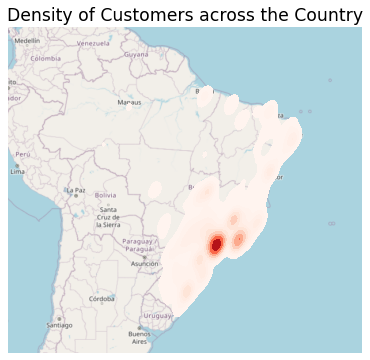

In [7]:
ax = gplt.kdeplot(gdf_customer, cmap="Reds", shade=True, projection=gcrs.WebMercator())
gplt.webmap(brazil_states, projection=gcrs.WebMercator(), ax=ax);
plt.title("Density of Customers across the Country", fontdict={'fontsize':'xx-large'});

#### 2) kde (isochrones not shaded) + polyplot

The parameter "clip" hepls bound the isochrones within the country map.

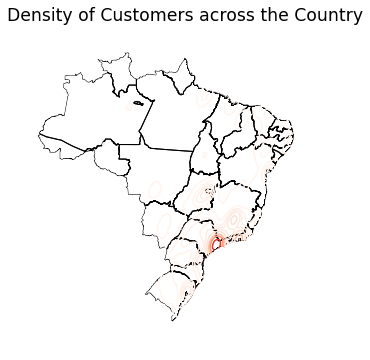

In [8]:
ax = gplt.kdeplot(gdf_customer, n_levels=10, cmap='Reds', projection=gcrs.WebMercator(),
                 clip=brazil_states)
gplt.polyplot(brazil_states, projection=gcrs.WebMercator(), ax=ax);
plt.title("Density of Customers across the Country", fontdict={'fontsize':'xx-large'});

#### 3) pointplot + webmap

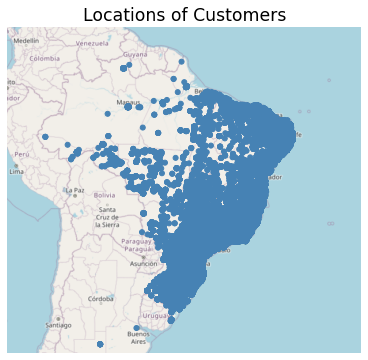

In [9]:
ax = gplt.pointplot(gdf_customer, projection=gcrs.WebMercator())
gplt.webmap(brazil_states, projection=gcrs.WebMercator(), ax=ax)
plt.title("Locations of Customers", fontdict={'fontsize':'xx-large'});

## Demo 2: choropleth -- by state

Since choropleth are meant to present aggregated data (often at the level of state), the customer data need to be grouped and counted by state, and shape files for the states need to be merged with the aggregated customer data in order for the shapes of all states to be drawn in the graph.

- Hue & The aggregated data: The aggregated data (grouped and counted customer data in this case) needs to be assigned to the "hue" parameter of the choropleth so that the hue of each state would be proportional to the value of the aggregated data.


- Polygon: Drawing shapes of different states of a country in choropleth require another geometry called Polygon that is extracted from the shape files.


The following choropleths will visualize the customer data of the Olist store over the Brazillian map by state.

### Steps:

### 1. Merge shape file with the dataset containing state codes

abbr_to_name contains the state codes of all states in Brazil. Since the customer data only indicates different states with state codes, while this shape file only contain the full name of each state, this shape file needs to be merged with abbr_to_name in order for the resulted data frame to contain the state codes, which enables the resulted data frame to be merged with the customer data.

In [10]:
abbr_to_name = abbr_to_name.loc[:,['subdivision', 'name']]
map_nameToabbr = pd.merge(brazil_states, abbr_to_name, left_on='NAME_1', right_on='name')
map_nameToabbr = map_nameToabbr.loc[:,['subdivision', 'name', 'geometry', 'NAME_1']]
map_nameToabbr.head(3)

,subdivision,name,geometry,NAME_1
0,AC,Acre,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",Acre
1,AL,Alagoas,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...",Alagoas
2,AP,Amapá,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",Amapá


### 2. Aggregate customer data by state & merge with shape file with state codes

1) Customer data need to be grouped and counted by states to count the number of custmers per state.


2) Shape file merged with state codes are merged with the aggregated customer data.


3) The merged data frame is converted to GeoDataFrame.

In [15]:
# group and count customer data
sgdf_customer_loc = df1.groupby('customer_state', as_index=False)\
.count().loc[:,['customer_state', 'customer_id']]

# merge grouped data with shape file merged with state codes
sgdf_customer_loc = pd.merge(sgdf_customer_loc, map_nameToabbr, left_on='customer_state',
                             right_on='subdivision')\
.loc[:,['customer_state', 'name', 'customer_id','geometry']]

sgdf_customer_loc.columns = ['state_code', 'state_name', 'customer_count', 'geometry']

sgdf_customer_loc = gpd.GeoDataFrame(sgdf_customer_loc)
sgdf_customer_loc.head(5)

,state_code,state_name,customer_count,geometry
0,AC,Acre,81,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,AL,Alagoas,413,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,AM,Amazonas,148,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
3,AP,Amapá,68,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
4,BA,Bahia,3380,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


### 3. plotting

Effects of using CRS and not using CRS can be observed.

It is suggested that legends are added to the graph by setting legend=True to present the correspondece between the hue of each state and the value of the aggregated data to be.

#### 1) not using CRS

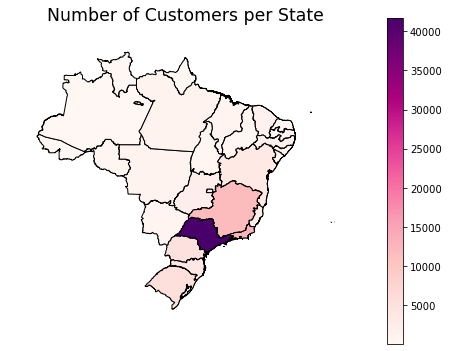

In [12]:
gplt.choropleth(sgdf_customer_loc, hue='customer_count', cmap='RdPu', legend=True)
plt.title("Number of Customers per State", fontdict={'fontsize':'xx-large'});

#### 2) using CRS (gcrs.WebMercator())

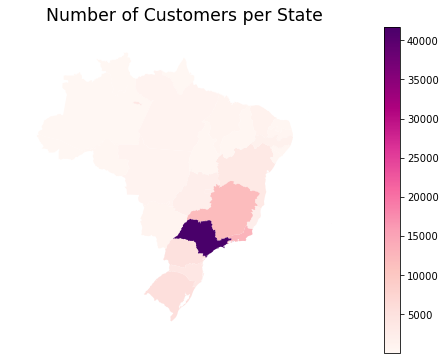

In [13]:
gplt.choropleth(sgdf_customer_loc, hue='customer_count', cmap='RdPu', legend=True, 
                projection=gcrs.WebMercator())
plt.title("Number of Customers per State", fontdict={'fontsize':'xx-large'});

#### 3）using CRS (gcrs.AlbersEqualArea())

**Note: Color scheme can be changed by chaging the "cmap" parameter of the choropleth (see below):**

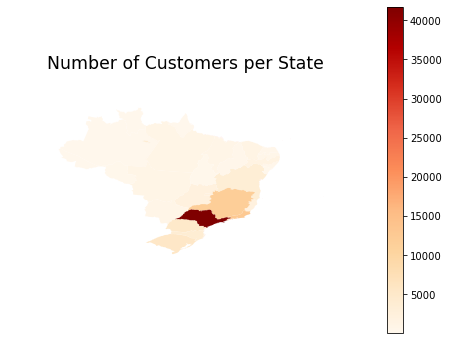

In [14]:
gplt.choropleth(sgdf_customer_loc, hue='customer_count', cmap='OrRd', legend=True, 
                projection=gcrs.AlbersEqualArea())
plt.title("Number of Customers per State", fontdict={'fontsize':'xx-large'});

## References

- https://residentmario.github.io/geoplot/index.html
- https://www.geeksforgeeks.org/working-with-geospatial-data-in-python/
- Data source 1 (e-commerce data): https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
- Data source 2 (shape files): http://diva-gis.org/datadown
- Data source 3 (state codes): https://github.com/datasets-br/state-codes/blob/master/data/br-state-codes.csv
